## import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## 1. Load and Preview Dataset

In [2]:
data = pd.read_csv('Dataset_Updated.csv')

# Display information of dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "description": data.describe(include='all'),
    "null_values": data.isnull().sum()
}

data_info
print(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9385 entries, 0 to 9384
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9385 non-null   int64  
 1   Restaurant Name       9385 non-null   object 
 2   Country Code          9385 non-null   int64  
 3   City                  9385 non-null   object 
 4   Address               9385 non-null   object 
 5   Locality              9385 non-null   object 
 6   Locality Verbose      9385 non-null   object 
 7   Longitude             9385 non-null   float64
 8   Latitude              9385 non-null   float64
 9   Cuisines              9376 non-null   object 
 10  Average Cost for two  9385 non-null   int64  
 11  Currency              9385 non-null   object 
 12  Has Table booking     9385 non-null   object 
 13  Has Online delivery   9385 non-null   object 
 14  Is delivering now     9385 non-null   object 
 15  Switch to order menu 

In [3]:
file_path = 'Dataset.csv'
data = pd.read_csv(file_path , encoding="utf-8-sig")

data_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "sample_rows": data.head(),
}

data_info

{'shape': (9385, 21),
 'columns': ['Restaurant ID',
  'Restaurant Name',
  'Country Code',
  'City',
  'Address',
  'Locality',
  'Locality Verbose',
  'Longitude',
  'Latitude',
  'Cuisines',
  'Average Cost for two',
  'Currency',
  'Has Table booking',
  'Has Online delivery',
  'Is delivering now',
  'Switch to order menu',
  'Price range',
  'Aggregate rating',
  'Rating color',
  'Rating text',
  'Votes'],
 'sample_rows':    Restaurant ID         Restaurant Name  Country Code              City  \
 0        6317637        Le Petit Souffle           162       Makati City   
 1        6304287        Izakaya Kikufuji           162       Makati City   
 2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
 3        6318506                    Ooma           162  Mandaluyong City   
 4        6314302             Sambo Kojin           162  Mandaluyong City   
 
                                              Address  \
 0  Third Floor, Century City Mall, Kalayaan Ave

## 2. Check for Missing Values

In [4]:
# Check for missing values
missing_values_summary = data.isnull().sum()

# Show columns with missing values and their counts
missing_values_summary = missing_values_summary[missing_values_summary > 0]

missing_values_summary


Cuisines    9
dtype: int64

## 3. Handle Missing Data

In [5]:
# Fill missing values in the 'Cuisines' column with 'Unknown'
data['Cuisines'] = data['Cuisines'].fillna('Unknown')
# Validate Longitude and Latitude: Check for invalid or out-of-range values
invalid_long_lat = data[(data['Longitude'] < -180) | (data['Longitude'] > 180) |
                        (data['Latitude'] < -90) | (data['Latitude'] > 90)]

# Count of invalid geospatial records
invalid_long_lat_count = invalid_long_lat.shape[0]

invalid_long_lat_count


0

## 4. Normalize and Clean Text Data

In [6]:
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Trim whitespace and standardize case (title case for readability)
columns_to_clean = ['City', 'Address', 'Locality', 'Locality Verbose', 'Restaurant Name']
for col in columns_to_clean:
    data[col] = data[col].str.strip().str.title()

# Normalize restaurant names (remove special characters or redundant spaces)
data['Restaurant Name'] = data['Restaurant Name'].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True).str.replace(r"\s+", " ", regex=True)

# Address standardization
address_replacements = {
    r'\bSt\b': 'Street',
    r'\bRd\b': 'Road',
    r'\bAve\b': 'Avenue',
    r'\bBlvd\b': 'Boulevard',
    r'\bDr\b': 'Drive'
}
for pattern, replacement in address_replacements.items():
    data['Address'] = data['Address'].str.replace(pattern, replacement, regex=True)

#Drop duplicate rows (if any)
data = data.drop_duplicates()

# Just ensuring no NaNs in Longitude/Latitude
data = data.dropna(subset=['Longitude', 'Latitude'])

# Display the cleaned data's first few rows to confirm changes
data_cleaned_preview = data.head()
data_cleaned_preview


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, Sm Megamall, O...","Sm Megamall, Ortigas, Mandaluyong City","Sm Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, Sm Megamall, Ortigas...","Sm Megamall, Ortigas, Mandaluyong City","Sm Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 5. Remove Unwanted Characters

In [7]:
# Function to check if a string contains any of the specified unwanted characters
def has_unwanted_characters(s):
    unwanted_chars = ['�', '_']  # List of unwanted characters to check for
    return any(char in str(s) for char in unwanted_chars)

# Read the CSV file
df = pd.read_csv("Dataset.csv", encoding='utf-8')  # Change with your file name

# Filter out rows that contain unwanted characters in any of the specified columns
columns_to_check = ['Restaurant Name', 'Address', 'City', 'Locality', 'Locality Verbose']  # Customize as needed

# Use apply() to check for unwanted characters in each column
df_cleaned = df[~df[columns_to_check].apply(lambda x: x.apply(has_unwanted_characters)).any(axis=1)]

# Save the cleaned data back to CSV
df_cleaned.to_csv("Dataset.csv", index=False, encoding='utf-8')

print("CSV file has been cleaned (unwanted characters removed) and saved successfully!")


CSV file has been cleaned (unwanted characters removed) and saved successfully!


## 6. Key Insights from Data

In [8]:
# Load the data
d0ata = pd.read_csv('Dataset.csv')

# Top-rated cities
top_cities = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Cities by Average Rating:")
print(top_cities)

# Countries with most restaurants
country_restaurants = data['Country Code'].value_counts().head(5)
print("Countries with Most Restaurants:")
print(country_restaurants)

# Save insights as a DataFrame for reference
insights = pd.DataFrame({
    'Top Cities': top_cities.index,
    'Average Rating': top_cities.values
})

insights.to_csv('Insights.csv', index=False)


Top 10 Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Lincoln             4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64
Countries with Most Restaurants:
Country Code
1      8575
216     431
215      80
214      60
189      59
Name: count, dtype: int64


## 7. Exploratory Data Analysis (EDA)

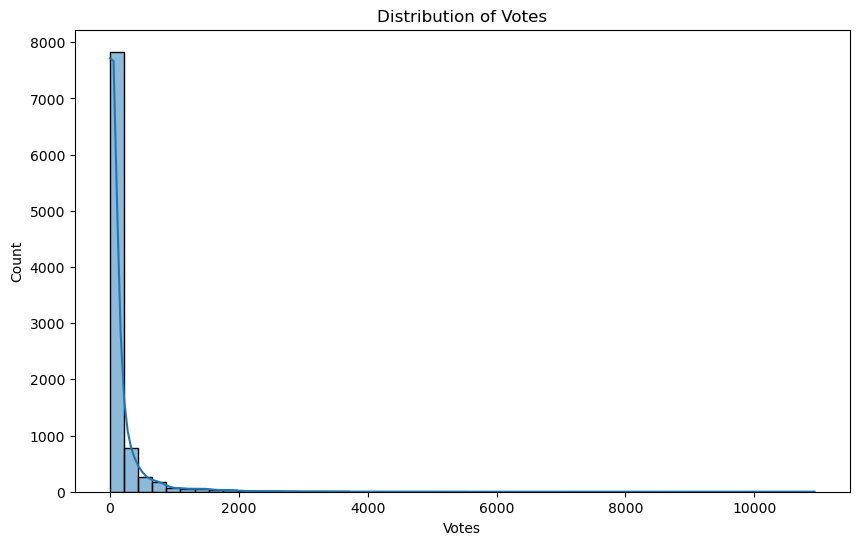

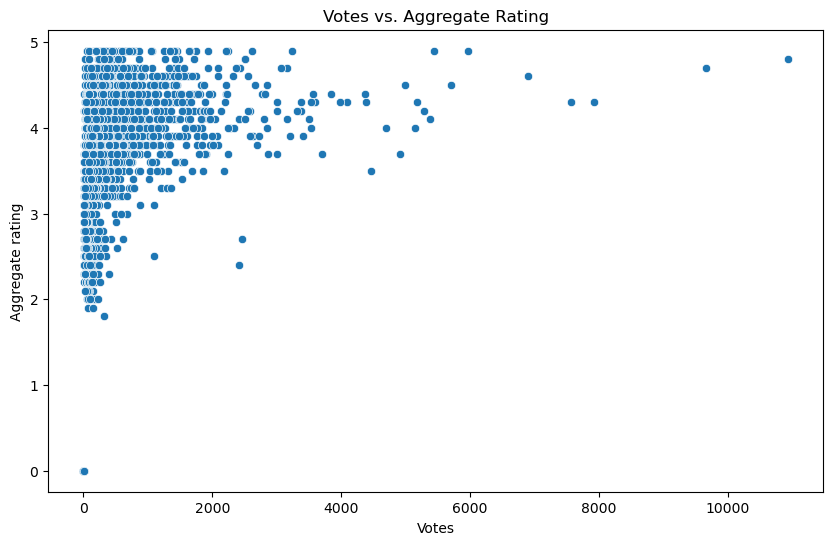

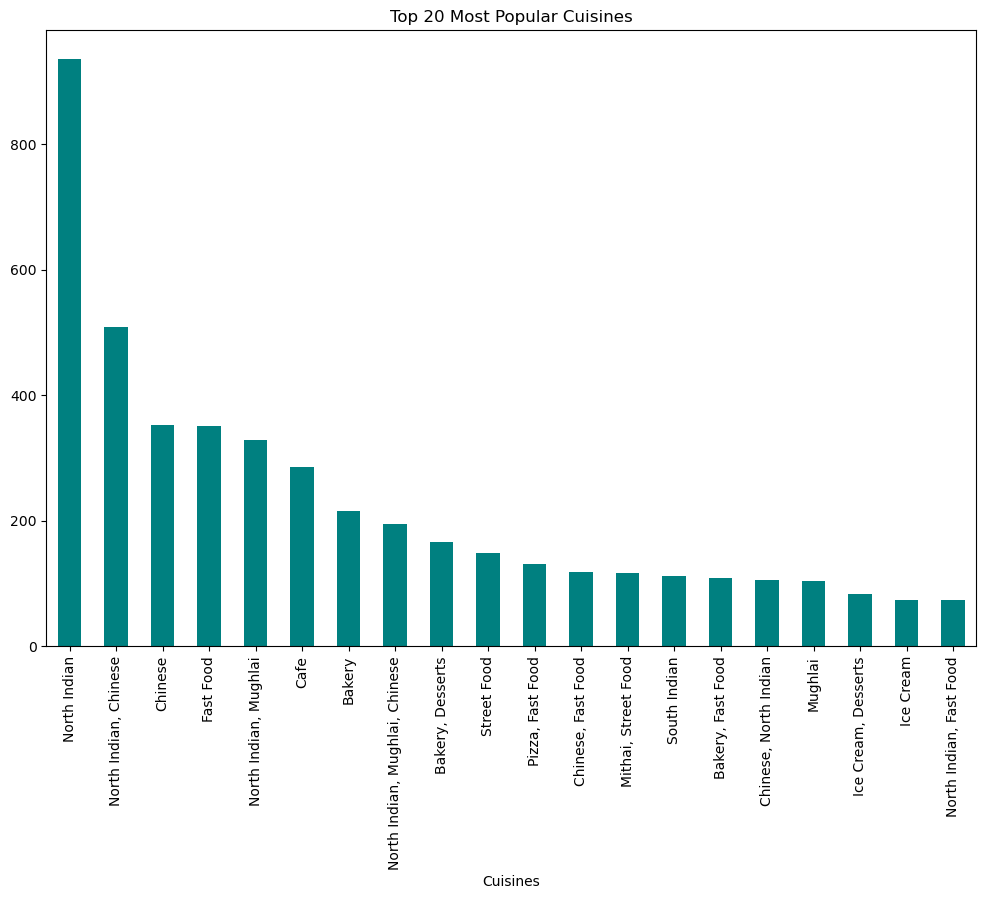

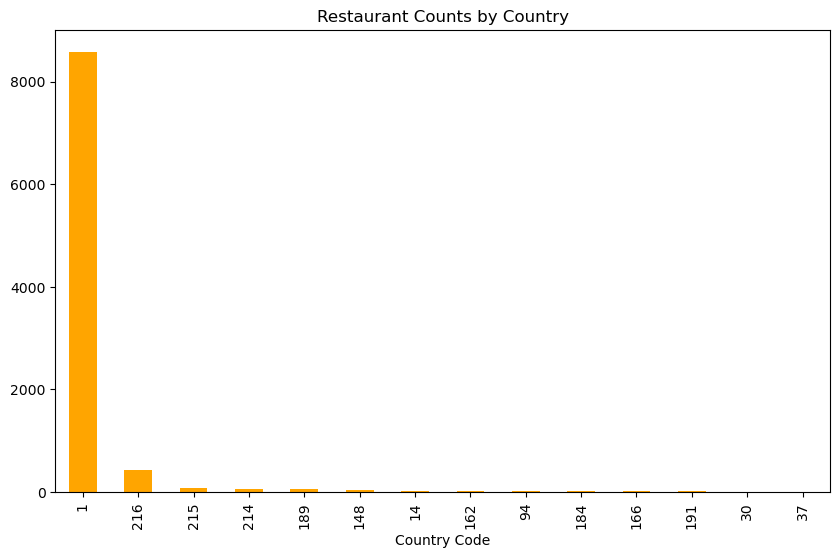

In [9]:
# Summary statistics
data.describe(include='all')

# Visualize distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(data['Votes'], bins=50, kde=True)
plt.title('Distribution of Votes')
plt.show()

# Aggregate rating vs. Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
plt.title('Votes vs. Aggregate Rating')
plt.show()

# Distribution of Cuisines
plt.figure(figsize=(12, 8))
data['Cuisines'].value_counts().head(20).plot(kind='bar', color='teal')
plt.title('Top 20 Most Popular Cuisines')
plt.show()

# Country analysis
country_counts = data['Country Code'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='orange')
plt.title('Restaurant Counts by Country')
plt.show()


## 8. Clustering and Segmentation

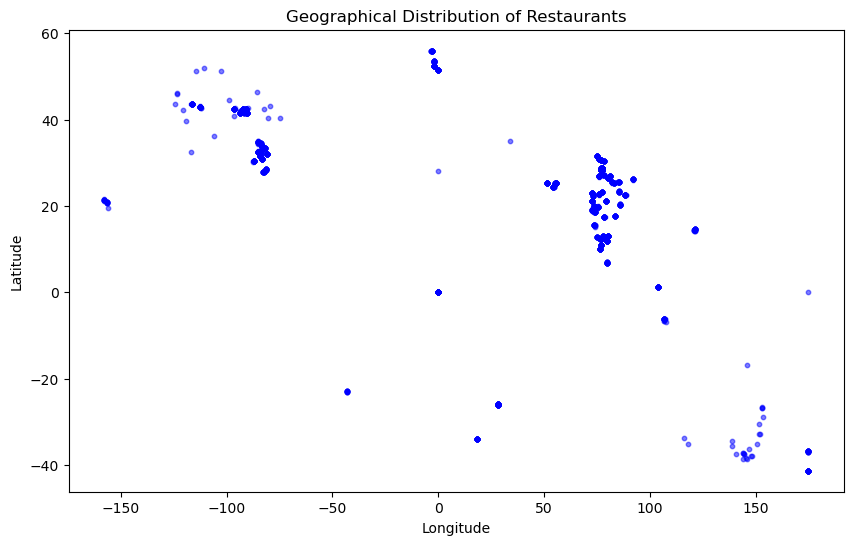

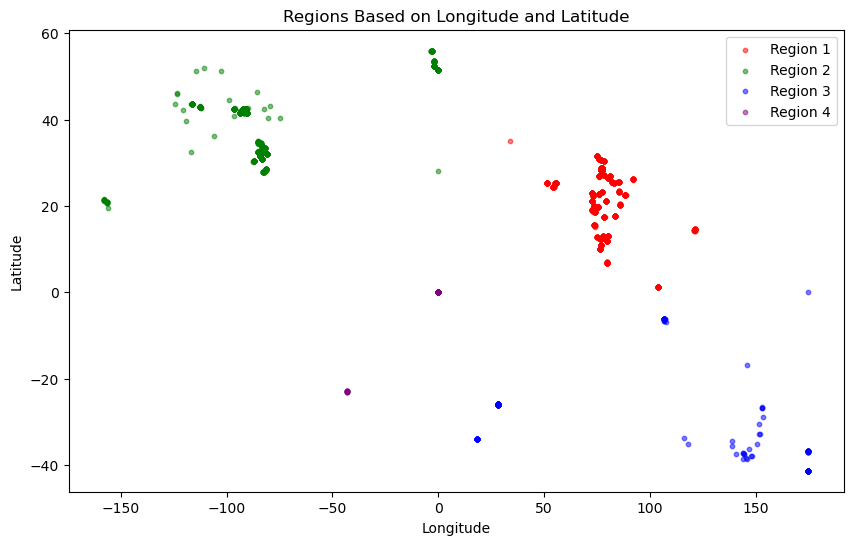

In [11]:
# Select numerical features for clustering
# Clustering based on longitude and latitude to identify regional groupings
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5, c='blue', s=10)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Manually identify clusters using regions or grouping on the map
# Example: Grouping by continent or proximity to specific longitude/latitude ranges

# Assign a region based on latitude and longitude ranges (e.g., dummy regions for simplicity)
def assign_region(row):
    if row['Latitude'] > 0:
        if row['Longitude'] > 0:
            return 'Region 1'
        else:
            return 'Region 2'
    else:
        if row['Longitude'] > 0:
            return 'Region 3'
        else:
            return 'Region 4'

data['Region'] = data.apply(assign_region, axis=1)

# Visualize the regions
plt.figure(figsize=(10, 6))
colors = {'Region 1': 'red', 'Region 2': 'green', 'Region 3': 'blue', 'Region 4': 'purple'}
for region, color in colors.items():
    region_data = data[data['Region'] == region]
    plt.scatter(region_data['Longitude'], region_data['Latitude'], label=region, alpha=0.5, s=10, c=color)
plt.title('Regions Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Create an interactive map using Folium
map_center = [median_latitude, median_longitude]
map_restaurants = folium.Map(location=map_center, zoom_start=12)

# Add markers for each restaurant
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Name: {row['Restaurant Name']}<br>Cuisine: {row['Cuisines']}<br>Rating: {row['Aggregate rating']}",
    ).add_to(map_restaurants)

# Save the interactive map
map_restaurants.save('restaurants_map.html')
